In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import time
import timeit
from scipy import stats

In [2]:
#reading all data csv files 

info = pd.read_csv('C:/Users/sdeekshitula/Downloads/OULAD/studentInfo.csv')
studentVle = pd.read_csv('C:/Users/sdeekshitula/Downloads/OULAD/studentVle.csv')
vle = pd.read_csv("C:/Users/sdeekshitula/Downloads/OULAD/vle.csv")
assessments = pd.read_csv("C:/Users/sdeekshitula/Downloads/OULAD/assessments.csv")
student_assessment = pd.read_csv("C:/Users/sdeekshitula/Downloads/OULAD/studentAssessment.csv")
courses = pd.read_csv("C:/Users/sdeekshitula/Downloads/OULAD/courses.csv")
student_registration = pd.read_csv("C:/Users/sdeekshitula/Downloads/OULAD/studentRegistration.csv")

In [3]:
num_modules = courses.code_module.nunique()
num_presentations = courses.code_presentation.count()
num_students = info.id_student.nunique()
num_registrations = student_registration.id_student.count()
num_interactions = studentVle.id_site.count()
num_vles = vle.id_site.count()

In [4]:
print ("Summary")
print(num_modules, "modules were offered in", num_presentations, "presentations")
print(num_registrations, "registrations were done by", num_students, "students")
print(num_interactions, "total VLE interactions for", num_vles, "VLE's")

Summary
7 modules were offered in 22 presentations
32593 registrations were done by 28785 students
10655280 total VLE interactions for 6364 VLE's


In [5]:
#cleaning data - understanding null values and improper data

In [6]:
#checking and cleaning Info dataframe

In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [8]:
info.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [9]:
info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [10]:
print(info.isna().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [11]:
info.groupby("code_module").count()

,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
code_module,,,,,,,,,,,
AAA,748,748,748,748,748,748,748,748,748,748,748
BBB,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909,7909
CCC,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434
DDD,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272,6272
EEE,2934,2934,2934,2934,2934,2934,2934,2934,2934,2934,2934
FFF,7762,7762,7762,7762,7762,7762,7762,7762,7762,7762,7762
GGG,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534


In [12]:
info.groupby("code_presentation").count()

,code_module,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
code_presentation,,,,,,,,,,,
2013B,4684,4684,4684,4684,4684,4684,4684,4684,4684,4684,4684
2013J,8845,8845,8845,8845,8845,8845,8845,8845,8845,8845,8845
2014B,7804,7804,7804,7804,7804,7804,7804,7804,7804,7804,7804
2014J,11260,11260,11260,11260,11260,11260,11260,11260,11260,11260,11260


In [13]:
info.groupby("gender").count()

,code_module,code_presentation,id_student,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
gender,,,,,,,,,,,
F,14718,14718,14718,14718,14718,14718,14718,14718,14718,14718,14718
M,17875,17875,17875,17875,17875,17875,17875,17875,17875,17875,17875


In [14]:
info.groupby("region").count()

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
region,,,,,,,,,,,
East Anglian Region,3340,3340,3340,3340,3340,3340,3340,3340,3340,3340,3340
East Midlands Region,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365
Ireland,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
London Region,3216,3216,3216,3216,3216,3216,3216,3216,3216,3216,3216
North Region,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823,1823
North Western Region,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906
Scotland,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446,3446
South East Region,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
South Region,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092


In [15]:
info.groupby("highest_education").count()

,code_module,code_presentation,id_student,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
highest_education,,,,,,,,,,,
A Level or Equivalent,14045,14045,14045,14045,14045,14045,14045,14045,14045,14045,14045
HE Qualification,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730
Lower Than A Level,13158,13158,13158,13158,13158,13158,13158,13158,13158,13158,13158
No Formal quals,347,347,347,347,347,347,347,347,347,347,347
Post Graduate Qualification,313,313,313,313,313,313,313,313,313,313,313


In [16]:
info.groupby("imd_band").sum()

,id_student,num_of_prev_attempts,studied_credits
imd_band,,,
0-10%,2284182381,696,272430
10-20,2403243621,638,285175
20-30%,2467407664,628,302425
30-40%,2562245088,579,285860
40-50%,2271543873,525,262725
50-60%,2267144160,483,242660
60-70%,2071598237,469,223170
70-80%,2059743094,381,222520
80-90%,2016824133,433,216335


In [17]:
info.imd_band.fillna('Missing', inplace = True)

In [18]:
#converting imd_band to numeric 

imd_new = {'90-100%':10, '20-30%':3, '30-40%':4, '50-60%':6, '80-90%':9, '70-80%':8,
       'Missing':5, '60-70%':7, '40-50%':5, '10-20':2, '0-10%':1}
info.imd_band = info.imd_band.map(imd_new)

info.fillna(0)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,3.0,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,4.0,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,2.0,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,5.0,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,3.0,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,10.0,35-55,0,30,N,Withdrawn


In [19]:
info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [20]:
info.groupby("age_band").sum()

,id_student,imd_band,num_of_prev_attempts,studied_credits
age_band,,,,
0-35,14616967015,113618.0,3657,1873590
35-55,8199181575,48949.0,1641,709680
55<=,216922610,1503.0,22,16305


In [21]:
info.groupby("disability").sum()

,id_student,imd_band,num_of_prev_attempts,studied_credits
disability,,,,
N,20720931544,149483.0,4555,2326515
Y,2312139656,14587.0,765,273060


In [22]:
info.groupby("final_result").sum()

,id_student,imd_band,num_of_prev_attempts,studied_credits
final_result,,,,
Distinction,2279469839,16975.0,196,217000
Fail,4769613684,33322.0,1736,536565
Pass,8775580209,65188.0,1492,917445
Withdrawn,7208407468,48585.0,1896,928565


In [23]:
#checking and cleaning studentVLE dataframe

In [24]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [25]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [26]:
studentVle.groupby("code_module").sum()

,id_student,id_site,date,sum_click
code_module,,,,
AAA,358534746260,247518586607,35937937,1246652
BBB,1104403748544,1150759519773,148144754,5234176
CCC,894581779967,1011058956952,120043899,4682149
DDD,1631116034667,1516928679201,195727245,5530089
EEE,690314461950,696368548094,91299494,3984227
FFF,2870427370059,2943606236211,376361672,17593922
GGG,264496346970,300802205456,46590613,1333884


In [27]:
studentVle.groupby("code_presentation").sum()

,id_student,id_site,date,sum_click
code_presentation,,,,
2013B,1330706644075,1011820771697,163129561,6955433
2013J,2191983705208,2008900822196,291079887,10945847
2014B,1562658677336,1658264528630,196887384,7903521
2014J,2728525461798,3188056609771,363008782,13800298


In [28]:
print(studentVle.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [29]:
#checking and cleaning VLE dataframe

In [30]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   int64 
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
 4   week_from          6364 non-null   object
 5   week_to            6364 non-null   object
dtypes: int64(1), object(5)
memory usage: 298.4+ KB


In [31]:
vle.describe()

,id_site
count,6.364000e+03
mean,7.260991e+05
std,1.283151e+05
min,5.267210e+05
25%,6.615928e+05
50%,7.300965e+05
75%,8.140162e+05
max,1.077905e+06


In [32]:
vle.groupby(["week_from", "week_to"]).count()


id_site  code_module  code_presentation  activity_type
week_from week_to                                                        
0         0              2            2                  2              2
1         1             80           80                 80             80
          2              4            4                  4              4
10        10            40           40                 40             40
11        11            47           47                 47             47
12        12            26           26                 26             26
13        13            31           31                 31             31
14        14            32           32                 32             32
15        15            46           46                 46             46
16        16            27           27                 27             27
17        17             4            4                  4              4
18        18            91           91                 91             91
19        19            29           29                 29             29
2         2             41           41                 41             41
20        20            43           43                 43             43
21        21            51           51                 51             51
22        22            38           38                 38             38
23        23            33           33                 33             33
24        24            33           33                 33             33
25        25            24           24                 24             24
26        26            30           30                 30             30
27        27            49           49                 49             49
28        28            63           63                 63             63
29        29            45           45                 45             45
3         3             33           33                 33             33
          4              2            2                  2              2
4         4             24           24                 24             24
5         5             31           31                 31             31
          7              2            2                  2              2
6         6             17           17                 17             17
7         7             15           15                 15             15
8         8             34           34                 34             34
          9              2            2                  2              2
9         9             52           52                 52             52
?         ?           5243         5243               5243           5243

In [33]:
vle = vle.replace('?', np.nan)
vle = vle[vle['week_from'].notna()]

In [34]:
print(vle.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64


In [35]:
#checking and cleaning assessments dataframe

In [36]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    object 
 5   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [37]:
#when we try to convert date to numeric, we see that '?' exists in some rows. We will first fix that 

assessments['date'] = assessments['date'].replace(['?'], '0').astype('int')

assessments[["date"]] = assessments[["date"]].apply(pd.to_numeric)

In [38]:
print(assessments.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [39]:
assessments.describe()

,id_assessment,date,weight
count,206.000000,206.000000,206.000000
mean,26473.975728,137.262136,20.873786
std,10098.625521,80.834605,30.384224
min,1752.000000,0.000000,0.000000
25%,15023.250000,61.000000,0.000000
50%,25364.500000,147.500000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [40]:
assessments.groupby("code_module").sum()

,id_assessment,date,weight
code_module,,,
AAA,21090,1142,400.0
BBB,630189,4285,800.0
CCC,517404,1863,600.0
DDD,887285,4022,800.0
EEE,460740,1850,600.0
FFF,1814046,9294,800.0
GGG,1122885,5820,300.0


In [41]:
assessments.groupby("code_presentation").sum()

,id_assessment,date,weight
code_presentation,,,
2013B,987899,5124,600.0
2013J,1349179,7749,1100.0
2014B,1597800,7745,1200.0
2014J,1518761,7658,1400.0


In [42]:
assessments.groupby("assessment_type").sum()

,id_assessment,date,weight
assessment_type,,,
CMA,2247418,14086,90.0
Exam,637760,3046,2400.0
TMA,2568461,11144,1810.0


In [43]:
#checking and cleaning student_assessment dataframe

In [44]:
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  int64 
 1   id_student      173912 non-null  int64 
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
 4   score           173912 non-null  object
dtypes: int64(4), object(1)
memory usage: 6.6+ MB


In [45]:
student_assessment.describe()

,id_assessment,id_student,date_submitted,is_banked
count,173912.000000,1.739120e+05,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977
std,8829.784254,5.523952e+05,71.484148,0.104194
min,1752.000000,6.516000e+03,-11.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000
max,37443.000000,2.698588e+06,608.000000,1.000000


In [46]:
student_assessment.groupby("is_banked").count()

,id_assessment,id_student,date_submitted,score
is_banked,,,,
0,172003,172003,172003,172003
1,1909,1909,1909,1909


In [47]:
#replace "?" scores with median score value
student_assessment.groupby("score").count()

,id_assessment,id_student,date_submitted,is_banked
score,,,,
0,329,329,329,329
1,729,729,729,729
10,118,118,118,118
100,18813,18813,18813,18813
11,97,97,97,97
...,...,...,...,...
96,2533,2533,2533,2533
97,1505,1505,1505,1505
98,1891,1891,1891,1891


In [48]:
student_assessment['score'] = student_assessment['score'].replace('?',np.nan)
student_assessment['score'] = student_assessment['score'].fillna((student_assessment['score'].median()))
student_assessment['score'] = student_assessment['score'].astype(int)

In [49]:
print(student_assessment.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [50]:
#checking and cleaning courses dataframe

In [51]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [52]:
print(courses.isnull().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


In [53]:
courses.groupby("code_module").count()

,code_presentation,module_presentation_length
code_module,,
AAA,2,2
BBB,4,4
CCC,2,2
DDD,4,4
EEE,3,3
FFF,4,4
GGG,3,3


In [54]:
courses.groupby("code_presentation").count()

,code_module,module_presentation_length
code_presentation,,
2013B,3,3
2013J,6,6
2014B,6,6
2014J,7,7


In [55]:
#checking and cleaning student_registration dataframe

In [56]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   code_module          32593 non-null  object
 1   code_presentation    32593 non-null  object
 2   id_student           32593 non-null  int64 
 3   date_registration    32593 non-null  object
 4   date_unregistration  32593 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [57]:
#impute "?" rows with median  
student_registration.groupby("date_registration").count()

,code_module,code_presentation,id_student,date_unregistration
date_registration,,,,
-1,58,58,58,58
-10,208,208,208,208
-100,208,208,208,208
-101,164,164,164,164
-102,245,245,245,245
...,...,...,...,...
81,1,1,1,1
82,1,1,1,1
83,1,1,1,1


In [58]:
student_registration['date_registration'] = student_registration['date_registration'].replace('?',np.nan)
student_registration['date_registration'] = student_registration['date_registration'].fillna((student_registration['date_registration'].median()))
student_registration['date_registration'] = student_registration['date_registration'].astype(int)

In [59]:
student_registration.groupby("date_unregistration").count()

,code_module,code_presentation,id_student,date_registration
date_unregistration,,,,
-1,147,147,147,147
-10,73,73,73,73
-100,7,7,7,7
-101,6,6,6,6
-102,3,3,3,3
...,...,...,...,...
96,37,37,37,37
97,50,50,50,50
98,5,5,5,5


In [60]:
student_registration['date_unregistration'] = student_registration['date_unregistration'].replace('?',np.nan)
student_registration['date_unregistration'] = student_registration['date_unregistration'].fillna((student_registration['date_unregistration'].median()))
student_registration['date_unregistration'] = student_registration['date_unregistration'].astype(int)

In [61]:
student_registration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,-69.394164,34.032645
std,5.491673e+05,49.228660,47.029187
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,27.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,27.000000
max,2.716795e+06,167.000000,444.000000


In [62]:
print(student_registration.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [63]:
#exploratory data analysis

In [64]:
print(info.id_student.count())

32593


In [65]:
info1 = info.groupby("final_result")
info1 = info1.agg({"id_student": "count"})
print(info1)

              id_student
final_result            
Distinction         3024
Fail                7052
Pass               12361
Withdrawn          10156


In [66]:
type(info1)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='final_result'>

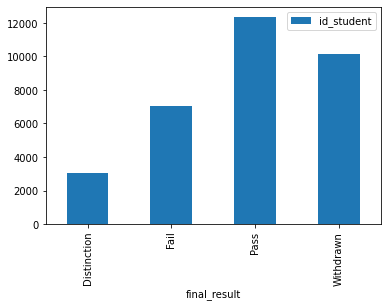

In [67]:
info1.plot(kind='bar', label = 'True')

In [68]:
#we see that 21.9% of students enrolled in courses for the given presentations fail and 31.5% withdraw
# this indicates that less than 50% enrolled in courses for the given presentations actually passed. 
#this seems to be the biggest problem area. 
# we can prevent this is we could detect these students in the early days of the program and take steps to mitigate this. 

In [69]:
#number of students who interacted with VLE 

print(len(info.id_student.unique()))

28785


In [70]:
print(len(studentVle.id_student.unique()))

26074


In [71]:
# tells us that 26074 students never interacted with VLE 

In [72]:
#results of students not in VLE 

unique_vle_students = set(studentVle.id_student)
unique_total_students = set(info.id_student)

students_not_in_vle = list(unique_total_students.difference(unique_vle_students))
df_not_in_vle = info[info.id_student.isin(students_not_in_vle)]

In [142]:
print(len(df_not_in_vle.id_student.unique()))

2711


In [73]:
df_not_in_vle.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
125,AAA,2013J,292923,F,South East Region,A Level or Equivalent,10.0,35-55,0,180,N,Withdrawn
198,AAA,2013J,405961,M,Scotland,A Level or Equivalent,10.0,0-35,0,240,Y,Withdrawn
299,AAA,2013J,2324976,F,Scotland,HE Qualification,10.0,35-55,0,60,N,Withdrawn
307,AAA,2013J,2365101,M,South East Region,HE Qualification,3.0,0-35,0,300,N,Withdrawn
512,AAA,2014J,323805,F,West Midlands Region,A Level or Equivalent,3.0,0-35,0,180,N,Withdrawn


In [74]:
df_not_in_vle1 = df_not_in_vle.groupby("final_result")
df_not_in_vle1 = df_not_in_vle1.agg({"id_student": "count"})
print(df_not_in_vle1)

              id_student
final_result            
Fail                 333
Pass                   3
Withdrawn           2516


<AxesSubplot:xlabel='final_result'>

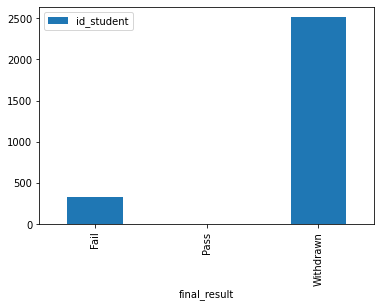

In [75]:
df_not_in_vle1.plot(kind='bar')

In [76]:
# the chart indicates that students who dont interact with VLE have a higher chance of withdrawing and failing. 
#VLE interaction might be a big indicator

In [77]:
#creating vle dataset
vle1= studentVle

sum_click = vle1.groupby(['code_module', 'code_presentation','id_student']).agg({'sum_click': ['sum']})

In [78]:
sum_click.head()
sum_click.columns = ['sum_clicks']

In [79]:
sum_click1 = sum_click.reset_index()
sum_click1.head()

,code_module,code_presentation,id_student,sum_clicks
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034


In [80]:
studentInfo_with_clicks = pd.merge(info, sum_click1,
                               on=['code_module','code_presentation','id_student'],
                               how='left')

In [81]:
studentInfo_with_clicks.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,3.0,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,4.0,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,Pass,1034.0


In [82]:
studentInfo_with_clicks.rename(columns={'55<=': "55+"}, inplace=True)

In [83]:
#replacing na with 0 as these students did not try VLE 
studentInfo_with_clicks.sum_clicks.fillna(0,inplace=True)

In [84]:
#working on assessments data
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [85]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


<AxesSubplot:>

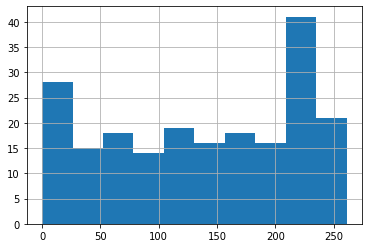

In [86]:
#most assessments happen towards the end of the presentation
assessments.date.hist()

In [87]:
#lets filter data for assessments that happen before 100 days to predict early
assessments = assessments[assessments.date<100]

In [88]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
5,AAA,2013J,1757,Exam,0,100.0
6,AAA,2014J,1758,TMA,19,10.0
7,AAA,2014J,1759,TMA,54,20.0


In [89]:
len(assessments.id_assessment.unique())

74

In [90]:
list_early_assessments = list(assessments.id_assessment.unique())

In [91]:
early_assessments = student_assessment[student_assessment['id_assessment'].isin(list_early_assessments) == True]

In [92]:
early_assessments

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79
...,...,...,...,...,...
170120,37435,541774,60,0,56
170121,37435,546286,60,0,69
170122,37435,546724,59,0,75
170123,37435,547334,59,0,54


In [93]:
#students grades early in the semester 

df_average_grade = early_assessments.groupby(['id_student']).agg({'score': ['mean']})
len(early_assessments.id_student.unique()) #23248
len(df_average_grade) 
df_average_grade.head()

,score
,mean
id_student,
6516,54.00
8462,87.00
11391,81.50
23629,82.50
23698,86.25


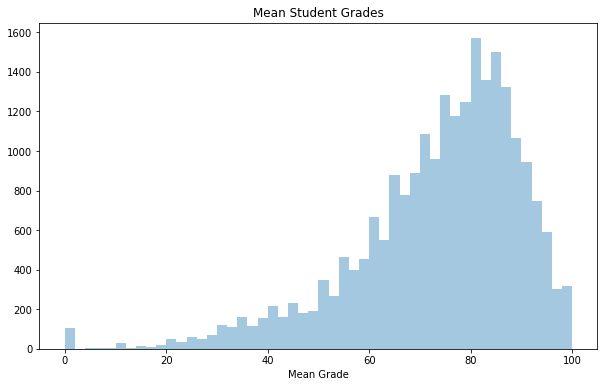

In [94]:
plt.figure(figsize=(10,6))
av_plot = sns.distplot(df_average_grade, kde=False)
av_plot.set_title('Mean Student Grades')
av_plot.set_xlabel('Mean Grade');

In [95]:
df_average_grade.describe()

,score
,mean
count,23267.000000
mean,73.269725
std,16.617641
min,0.000000
25%,65.000000
50%,76.666667
75%,85.000000
max,100.000000


In [96]:
len(studentInfo_with_clicks.id_student.unique()) - len(df_average_grade)

5518

In [97]:
df_average_grade

,score
,mean
id_student,
6516,54.00
8462,87.00
11391,81.50
23629,82.50
23698,86.25
...,...
2698251,66.00
2698257,61.00


In [98]:
df_average_grade.columns = ['mean_grade']
df_average_grade.reset_index(inplace=True)

In [99]:
df_average_grade.head()

,id_student,mean_grade
0,6516,54.00
1,8462,87.00
2,11391,81.50
3,23629,82.50
4,23698,86.25


In [100]:
#merge with main dataset

studentInfo_with_clicks = pd.merge(studentInfo_with_clicks, df_average_grade,
                               on=['id_student'],
                               how='left')

In [101]:
studentInfo_with_clicks['mean_grade'].fillna(studentInfo_with_clicks['mean_grade'].median(),inplace=True)
studentInfo_with_clicks.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
sum_clicks                 0
mean_grade                 0
dtype: int64

In [102]:
studentInfo_with_clicks.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_clicks,mean_grade
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,Pass,934.0,81.500000
1,AAA,2013J,28400,F,Scotland,HE Qualification,3.0,35-55,0,60,N,Pass,1435.0,69.000000
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,4.0,35-55,0,60,Y,Withdrawn,281.0,76.333333
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,Pass,2158.0,71.500000
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,Pass,1034.0,49.500000


In [103]:
#exploring final result as a function of student variables - 
# gender, disability, age, highest education, region, imd band

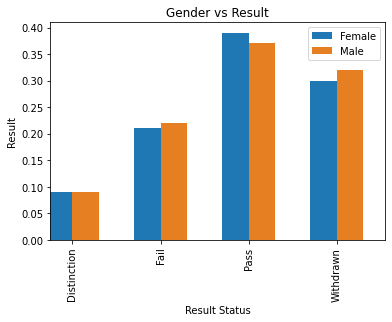

In [104]:
#gender

gender = info.groupby(['gender'],as_index = False)
count_gender = gender['id_student'].count()
result_gender = info.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge = pd.merge(count_gender, result_gender_count, on = 'gender', how = 'left')

merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 
ax = fig.add_subplot(111) 
female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)

female.plot(kind='bar',  ax=ax, width= 0.3, position = 1)
male.plot(kind='bar',color = '#E67E22',  ax=ax, width= 0.3, position = 0 )

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

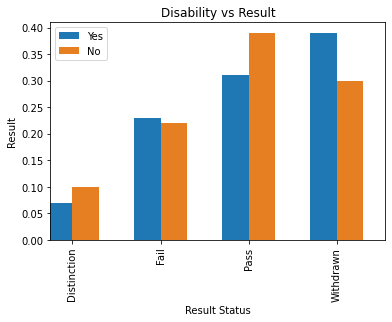

In [105]:
#disability

disability = info.groupby(['disability'],as_index = False)
count_disability = disability['id_student'].count()
result_disability = info.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(count_disability, result_disability_count, on = 'disability', how = 'left')

merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 
ax = fig.add_subplot(111) 
yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)

yes.plot(kind='bar',  ax=ax, width= 0.3, position = 1)
no.plot(kind='bar',color = '#E67E22',  ax=ax, width= 0.3, position = 0 )

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

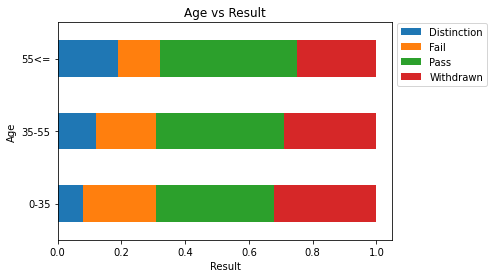

In [106]:
#Age

age = info.groupby(['age_band'],as_index = False)
count_age = age['id_student'].count()
result_age = info.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(count_age, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

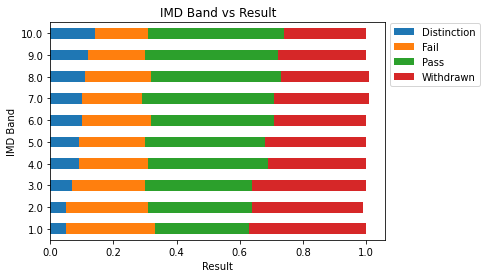

In [107]:
#IMD Band

imd = info.groupby(['imd_band'],as_index = False)
count_imd = imd['id_student'].count()
result_imd = info.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(count_imd, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

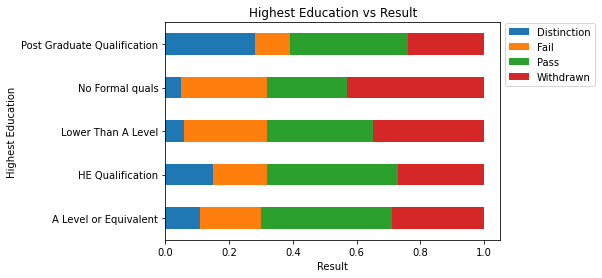

In [108]:
#Highest Education

education = info.groupby(['highest_education'],as_index = False)
count_education = education['id_student'].count()
result_education = info.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(count_education, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

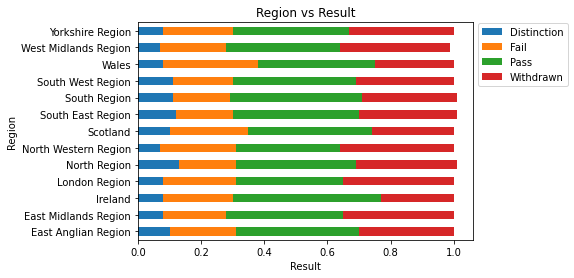

In [109]:
#Region

region = info.groupby(['region'],as_index = False)
count_region = region['id_student'].count()
result_region = info.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(count_region, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

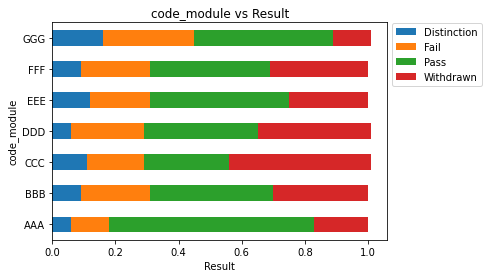

In [110]:
#code_module

code_module = info.groupby(['code_module'],as_index = False)
count_code_module = code_module['id_student'].count()
result_code_module = info.groupby(['code_module', 'final_result'],as_index = False)
result_count_code_module = result_code_module['id_student'].count()

merge = pd.merge(count_code_module, result_count_code_module , on = 'code_module', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['code_module','final_result', '_']]

merge.set_index(['code_module','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('code_module')
plt.xlabel('Result')
plt.title('code_module vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [111]:
# since our focus is failing and withdrawing, joinng 'Distinction'  with 'Pass'

studentInfo_with_clicks.loc[studentInfo_with_clicks['final_result'] == 'Distinction','final_result'] = 'Pass'

In [112]:
studentInfo_with_clicks.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_clicks,mean_grade
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,N,Pass,934.0,81.500000
1,AAA,2013J,28400,F,Scotland,HE Qualification,3.0,35-55,0,60,N,Pass,1435.0,69.000000
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,4.0,35-55,0,60,Y,Withdrawn,281.0,76.333333
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,N,Pass,2158.0,71.500000
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,N,Pass,1034.0,49.500000


In [113]:
df1 = studentInfo_with_clicks.copy()

In [114]:
df1['code_module'] =df1['code_module'].astype('category').cat.codes
df1['code_presentation'] =df1['code_presentation'].astype('category').cat.codes
df1['gender'] =df1['gender'].astype('category').cat.codes
df1['region'] =df1['region'].astype('category').cat.codes
df1['highest_education'] =df1['highest_education'].astype('category').cat.codes
df1['age_band'] =df1['age_band'].astype('category').cat.codes
df1['disability'] =df1['disability'].astype('category').cat.codes

df1['final_result'] =df1['final_result'].astype('category').cat.codes

In [115]:
df1[df1.columns[1:]].corr()['final_result'][:]

code_presentation       0.076750
id_student              0.019020
gender                  0.001598
region                 -0.007538
highest_education       0.001213
imd_band               -0.006839
age_band                0.003553
num_of_prev_attempts   -0.030776
studied_credits         0.149779
disability              0.033330
final_result            1.000000
sum_clicks             -0.130356
mean_grade              0.057006
Name: final_result, dtype: float64

In [116]:
df = studentInfo_with_clicks.copy()

In [117]:
drop_cols = ['id_student']
df.drop(drop_cols, axis=1,inplace=True)

In [118]:
#creating dummy variables

categorical_cols = ['code_module', 'code_presentation', 'gender', 'region','highest_education', 'age_band','disability']

df = pd.get_dummies(data = df,columns = categorical_cols, drop_first= True)

In [119]:
df.head()

,imd_band,num_of_prev_attempts,studied_credits,final_result,sum_clicks,mean_grade,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,...,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_35-55,age_band_55<=,disability_Y
0,10.0,0,240,Pass,934.0,81.500000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.0,0,60,Pass,1435.0,69.000000,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,4.0,0,60,Withdrawn,281.0,76.333333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,6.0,0,60,Pass,2158.0,71.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6.0,0,60,Pass,1034.0,49.500000,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [120]:
df.columns

Index(['imd_band', 'num_of_prev_attempts', 'studied_credits', 'final_result',
       'sum_clicks', 'mean_grade', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013J', 'code_presentation_2014B',
       'code_presentation_2014J', 'gender_M', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'age_band_35-55',
       'age_band_55<=', 'disability_Y'],
      dtype='object')

In [121]:
#splitting training and testing dataset -cutting off 10% data for final testing

from sklearn.model_selection import train_test_split

X_testing = df.drop('final_result',axis=1)
y_testing = df.final_result

X_train, X_test, y_train, y_test = train_test_split(X_testing, y_testing, test_size=0.1, random_state=100)

In [122]:
df.final_result.value_counts(normalize = True)

Pass         0.472034
Withdrawn    0.311601
Fail         0.216365
Name: final_result, dtype: float64

In [123]:
X_train.fillna(X_train.mean(), inplace=True)

C:\Users\sdeekshitula\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [124]:
X_test.fillna(X_train.mean(), inplace=True)

In [125]:
#we see class imbalance here, using smote to fix it 

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_sample(X_train, y_train);

In [126]:
#joining upsampled data back 

X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train)

df = pd.concat([X_train,y_train],axis=1)

In [127]:
df.shape

(41427, 35)

In [128]:
df.head()

,imd_band,num_of_prev_attempts,studied_credits,sum_clicks,mean_grade,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_35-55,age_band_55<=,disability_Y,final_result
0,10.0,0,120,1411.0,78.400000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pass
1,3.0,0,60,1355.0,87.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Withdrawn
2,8.0,0,60,325.0,89.666667,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Withdrawn
3,4.0,0,120,187.0,67.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Withdrawn
4,2.0,0,60,1145.0,66.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Withdrawn


In [129]:
#we now see equal distribution among classes

df.final_result.value_counts(normalize=True)

Withdrawn    0.333333
Pass         0.333333
Fail         0.333333
Name: final_result, dtype: float64

In [130]:
df.head()

,imd_band,num_of_prev_attempts,studied_credits,sum_clicks,mean_grade,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_35-55,age_band_55<=,disability_Y,final_result
0,10.0,0,120,1411.0,78.400000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pass
1,3.0,0,60,1355.0,87.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Withdrawn
2,8.0,0,60,325.0,89.666667,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,Withdrawn
3,4.0,0,120,187.0,67.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Withdrawn
4,2.0,0,60,1145.0,66.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Withdrawn


In [131]:
#modelling

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

#import stats_for_classification as stats
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pylab as pl
import xgboost

In [133]:
#decision tree

from sklearn import metrics

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train);
y_pred=clf.predict(X_test)

print('Training score: :'+str(round(clf.score(X_train,y_train),3)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: :0.999
Testing Accuracy: 0.6251533742331289


In [134]:
#random forest

from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train);
y_pred=clf.predict(X_test)
    
print('Training score: :'+str(round(clf.score(X_train,y_train),3)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: :0.999
Testing Accuracy: 0.7303680981595092


In [135]:
import lightgbm as lgb
LGBM_pipeline = lgb.LGBMClassifier(nthread=1)

# Set grid search params
param_grid_lgb = {
    'learning_rate': [0.1,0.2], 
    'max_depth': [20,40,80],
    'num_leaves': [40,80,160],
    'min_child_weight': [40], 
   'subsample': [0.6], 
    'n_estimators': [50,100],
}

grid_lgb = GridSearchCV(LGBM_pipeline, param_grid_lgb, scoring='accuracy', cv=None, n_jobs=1)
grid_lgb.fit(X_train, y_train)

grid_lgb.best_params_

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=1 will be ignored. Current value

{'learning_rate': 0.2,
 'max_depth': 80,
 'min_child_weight': 40,
 'n_estimators': 100,
 'num_leaves': 160,
 'subsample': 0.6}

In [136]:
model = lgb.LGBMClassifier(learning_rate= 0.2,max_depth=80,min_child_weight= 40,subsample=0.6,n_estimators=100, num_leaves = 160)
   
model.fit(X_train, y_train)
model_preds = model.predict(X_test)

print('Training score: :'+str(round(model.score(X_train,y_train),3)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, model_preds))

Training score: :0.881
Testing Accuracy: 0.7187116564417177


In [137]:
print(classification_report(y_test, model_preds))
print(accuracy_score(y_test, model_preds))

              precision    recall  f1-score   support

        Fail       0.45      0.38      0.41       685
        Pass       0.81      0.89      0.85      1576
   Withdrawn       0.72      0.68      0.70       999

    accuracy                           0.72      3260
   macro avg       0.66      0.65      0.65      3260
weighted avg       0.71      0.72      0.71      3260

0.7187116564417177


In [138]:
#the model has a test accuacy of 72% and is prone to less overfitting than the previous models

In [139]:
#model conclusion

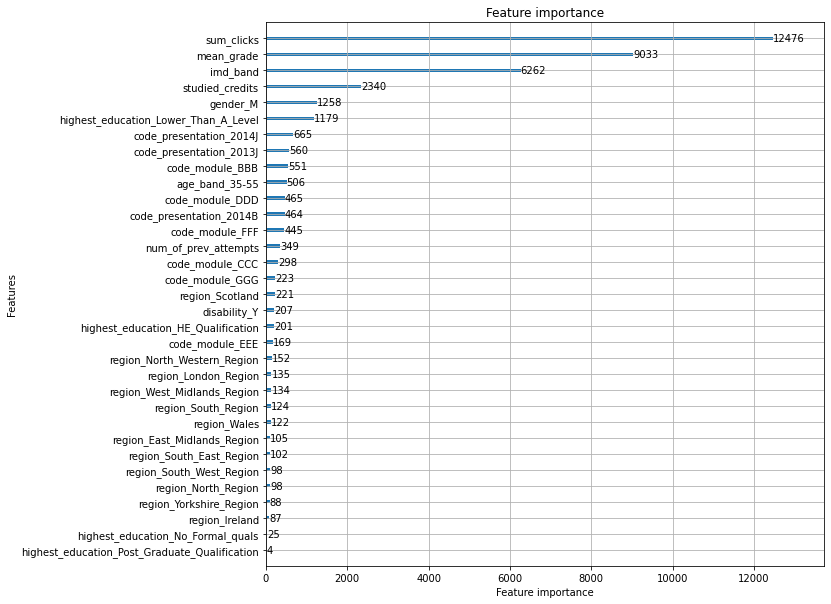

In [140]:
plt.rcParams["figure.figsize"] = (10,10)
lgb.plot_importance(model)
plt.savefig('expl.pdf', format='pdf', dpi=1200)

In [141]:
#top 4 most important features are: sum_clicks, mean_grade, imd_band, studied_credits